<a href="https://colab.research.google.com/github/aalperenpolat/stock_price/blob/main/stockprice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock

Bu uygulama run all diyerek başlatılabilir. Her gün hisse fiyatları güncelleneceği için program her çalıştırıldığında baştan training yapacaktır. Şirketi seçtikten sonra lütfen sayfanın en altına giderek tahminin ekrana yazdırılmasını bekleyiniz.

In [ ]:
menu = """

Hisse senedi fiyat tahmini uygulamasına hoş geldiniz!

Yarın için hisse senedi fiyat tahmini yapmak istediğiniz
şirketi lütfen aşağıdaki listeden seçiniz.

1) Apple
2) Microsoft
3) Starbucks


"""


chosen_number = input(menu)

if chosen_number == "1":
  input_company = "AAPL"

elif chosen_number == "2":
  input_company = "MSFT"

elif chosen_number == "3":
  input_company = "SBUX"

else:
  print("Lütfen geçerli bir sayı giriniz")

 

Hisse senedi fiyat tahmini uygulamasına hoş geldiniz!

Yarın için hisse senedi fiyat tahmini yapmak istediğiniz
şirketi lütfen aşağıdaki listeden seçiniz.

1) Apple
2) Microsoft
3) Starbucks


1


###Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web
import datetime as dt
import yfinance as yf


from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

###Loading Data

In [ ]:
#Loading Data

company = input_company

start = dt.datetime(2015,1,1)
end = dt.datetime(2023,1,1)

data = yf.download(company, start, end)

#Preparing data

scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

prediction_days = 60

X_train = []
y_train = []


for x in range(prediction_days, len(scaled_data)):
  X_train.append(scaled_data[x-prediction_days:x, 0])
  y_train.append(scaled_data[x, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))


[*********************100%%**********************]  1 of 1 completed


###Building Model

In [ ]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1)) #Prediction


model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
62/62 [==============================] - 12s 88ms/step - loss: 0.0169
Epoch 2/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0029
Epoch 3/10
62/62 [==============================] - 7s 108ms/step - loss: 0.0026
Epoch 4/10
62/62 [==============================] - 5s 78ms/step - loss: 0.0028
Epoch 5/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0030
Epoch 6/10
62/62 [==============================] - 7s 112ms/step - loss: 0.0024
Epoch 7/10
62/62 [==============================] - 5s 77ms/step - loss: 0.0025
Epoch 8/10
62/62 [==============================] - 5s 76ms/step - loss: 0.0023
Epoch 9/10
62/62 [==============================] - 7s 118ms/step - loss: 0.0030
Epoch 10/10
62/62 [==============================] - 5s 82ms/step - loss: 0.0024


###Saving the Model

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

# Save the model
model.save(f"/content/drive/MyDrive/Techcareer_Essential_AI_Bootcamp/Week3/Apple Stock Price/{company}_model.h5")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


###Test

In [ ]:
test_start = dt.datetime(2023,1,1)
test_end = dt.datetime.now()

test_data = yf.download(company, test_start, test_end)

actual_prices = test_data['Close'].values

total_dataset = pd.concat((data['Close'], test_data['Close']), axis=0)

model_inputs = total_dataset[len(total_dataset) - len(test_data) - prediction_days:].values
model_inputs = model_inputs.reshape(-1,1)
model_inputs = scaler.transform(model_inputs)

[*********************100%%**********************]  1 of 1 completed


###Making Predictions on Test Data

In [ ]:
X_test = []

for x in range(prediction_days, len(model_inputs)):
  X_test.append(model_inputs[x-prediction_days:x, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)

9/9 [==============================] - 2s 31ms/step


#Plotting the Test Predictions

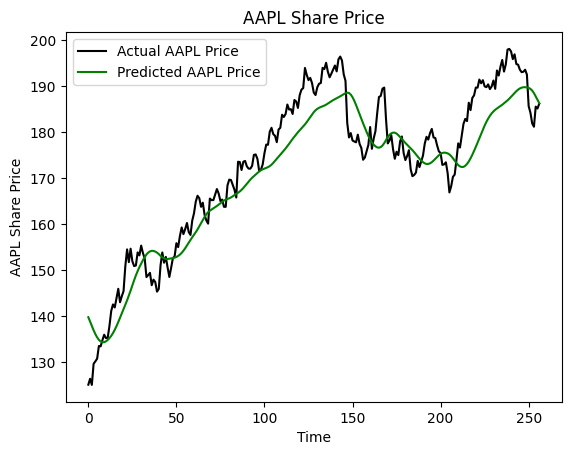

In [ ]:
plt.plot(actual_prices, color="black", label=f"Actual {company} Price")
plt.plot(predicted_prices, color="green", label=f"Predicted {company} Price")
plt.title(f"{company} Share Price")
plt.xlabel("Time")
plt.ylabel(f"{company} Share Price")
plt.legend()
plt.show()

###Loading Existing Models

In [ ]:
'''from keras.models import load_model

# Load the model
model = load_model("/content/drive/MyDrive/Techcareer_Essential_AI_Bootcamp/Week3/Apple Stock Price/THYAO.IS_model.h5")
'''

'from keras.models import load_model\n\n# Load the model\nmodel = load_model("/content/drive/MyDrive/Techcareer_Essential_AI_Bootcamp/Week3/Apple Stock Price/THYAO.IS_model.h5")\n'

###Predicting the Next Day

In [ ]:
real_data = [model_inputs[len(model_inputs)+1 - prediction_days:len(model_inputs+1),0]]
real_data = np.array(real_data)
real_data = np.reshape(real_data, (real_data.shape[0], real_data.shape[1], 1))

prediction = model.predict(real_data)
prediction = scaler.inverse_transform(prediction)
print(f"Seçtiğiniz şirketin yarın için hisse senedi fiyat tavsiyesi: {prediction}")



1/1 [==============================] - 2s 2s/step
Seçtiğiniz şirketin yarın için hisse senedi fiyat tavsiyesi: [[185.62886]]
